# The Schechter Function

The Schechter function (Schechter 1975) is an analytic expression for the luminosity of galaxies which can be written as follows:

$$\phi(L) = \left( \frac{\phi^*}{L^*} \right) \left( \frac{L}{L^*} \right)^\alpha \exp{\left( -\frac{L}{L^*} \right)}$$

This function essentially describes the number of galaxies in the given range of luminosity $L$ to $L+dL$. It is evident from the above equation that it is a three parameter function with parameters $\phi^*$, $L^*$ and $\alpha$. Here, $\alpha$ represents the power-law parameter for the faint-end and $L^*$ is the characteristic luminosity, while $\phi*$ serves as the normalisation constant.

The aforementioned Schechter function is the function of the luminosities, but in practice, one can tranlate the function into the function of the absolute magnitude of the galaxies. Such function can be written as,

$$ \phi(M) = 0.921 \phi^* 10^{0.4(\alpha + 1)(M^* - M)} \exp{\left( -10^{0.4(M^* - M)} \right)}$$

Here, $M$ and $M^*$ represents the absolute magnitude and the characteristic absolute magnitude respectively.

Below we try to write a simple python function to calculate both of the versions of the Schechter function.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as inte
import utils as utl

In [2]:
def schechter(lum, phi1, lum1, alpha):
    """
    The Schechter Function
    ----------------------
    Paramters:
    ----------
    lum : float, numpy.ndarray
        input luminosities of the galaxies
    phi1 : float
        normalisation constant
    lum1 : float
        characteristic luminosity
        the 'knee' of the function
    alpha : float
        the faint-end slope of power-law function
    ----------
    returns:
    ----------
    float or numpy.ndarray
        number of galaxies in given luminosity range
    """
    ab = phi1/lum1
    cd = (lum/lum1)**alpha
    expp = np.exp(-(lum/lum1))
    xy = ab*cd*expp
    return xy

def schechter_mag(M, phi1, m1, alpha):
    """
    The Schechter Function
    as described above.
    -------------------
    Parameters:
    -----------
    M : float, or numpy.ndarray
        absolute magnitude of the galaxies
    phi1 : float
        normalisation constant
    m1 : float
        the characteristic absolute magnitude
    alpha : float
        the faint-end slope of power-law function
    -----------
    returns
    -----------
    float or numpy.ndarray
        number of galaxies in given absolute magnitude range
    """
    ab = 0.921*phi1
    cd = 10**(0.4*(alpha + 1)*(m1 - M))
    ef = np.exp(-10**(0.4*(m1-M)))
    return ab*cd*ef

### The logarithmic Schechter Function

It is a general practice to use logarithmic units in the Schechter function, which can be converted easily and can be written as following,

$$\phi(\log L) = \ln 10 \phi^* 10^{(\alpha + 1)(\log L - \log L^*)} \exp{\left( -10^{\log L - \log L^*} \right)}$$

The constant parameters have their usual meanings.

Below, we try to define such Schechter function.

In [6]:
def log_schechter(lum, lum1, phi1, alpha):
    """
    The Normalised logarithmic Schechter Function
    ---------------------------------------------
    Parameters:
    -----------
    lum : float, numpy.ndarray
        luminosity range
    phi1 : float
        normalisation constant
    lum1 : float
        characteristic luminosity
        the 'knee' of the function
    alpha : float
        the faint-end slope of power law
    -----------
    return
    -----------
    float, numpy.ndarray
        number of galaxies in given bin
    """
    ab = np.log(10)*10**((alpha+1)*(lum))
    cd = np.exp(-10**(lum))
    return ab*cd

Below, we try to plot the Schechter function for the range of absolute magnitudes $M=-19$ to $M=-25$ with the characteristic magnitude $M^*=-19$, the faint-end slope for the power law to $-1$ and the normalisation constant $\phi^* = 1$.

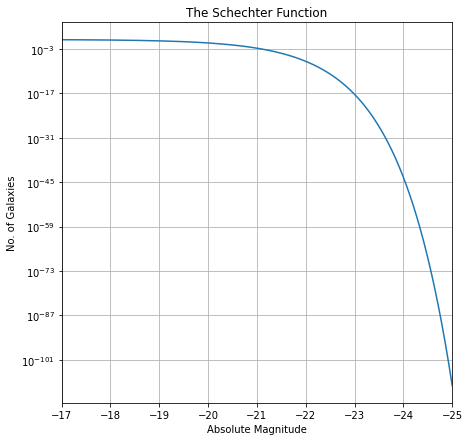

In [3]:
m_abs = np.linspace(-25, -16, 1000)
phi1 = 1000000
m1 = -19
al = -1

nos = schechter_mag(m_abs, m1, al)

figure, ax = plt.subplots(figsize=(7,7))
ax.plot(m_abs, nos)
ax.set_xlim(-17, -25)
ax.set_yscale('log')
ax.set_xlabel('Absolute Magnitude')
ax.set_ylabel('No. of Galaxies')
ax.set_title('The Schechter Function')
ax.grid()

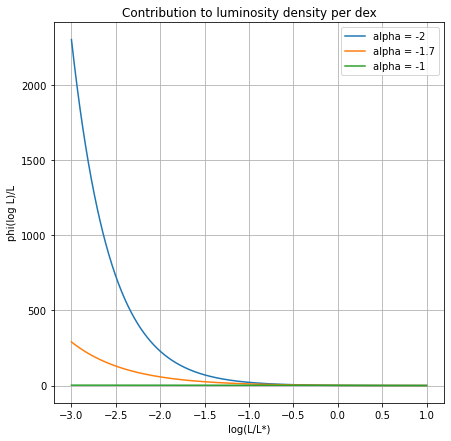

In [7]:
lum = np.linspace(-3, 1, 1000)
nos_2 = log_schechter(lum, -2)
nos_17 = log_schechter(lum, -1.7)
nos_1 = log_schechter(lum, -1)

plt.figure(figsize=(7,7))
plt.plot(lum, nos_2, label='alpha = -2')
plt.plot(lum, nos_17, label='alpha = -1.7')
plt.plot(lum, nos_1, label='alpha = -1')

plt.xlabel('log(L/L*)')
plt.ylabel('phi(log L)/L')
plt.title('Contribution to luminosity density per dex')
plt.grid()
plt.legend(loc='best')
